# AN, SIA, SIDIS, AUTsinphiS Analysis

In [6]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [8]:
load_config('inputs/an_sia_sidis_aUTspS.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 9044
multiprocess setup: ncpus=4 / observable
loading sia data sets 2009
multiprocess setup: ncpus=4 / observable
loading AN data sets 2003
multiprocess setup: ncpus=4 / observable


## Load SIA data from files

In [4]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',         u'dz1',         u'dz2',
           u'hadron1',     u'hadron2',           u'i',         u'obs',
                u'pT',       u'pTmax',       u'pTmin',          u'qT',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',       u'syt_u',         u'thy',       u'value',
                u'z1',       u'z1max',       u'z1min',          u'z2',
             u'z2max',       u'z2min'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [5]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 52
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 52
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16


## Plot results 
Plot the data vs. theory curves

In [6]:
data = {}

for key, value in conf['resman'].siares.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [7]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [8]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [9]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',         u'dz1',         u'dz2',
           u'hadron1',     u'hadron2',           u'i',         u'obs',
                u'pT',       u'pTmax',       u'pTmin',          u'qT',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',       u'syt_u',         u'thy',       u'value',
                u'z1',       u'z1max',       u'z1min',          u'z2',
             u'z2max',       u'z2min'],
      dtype='object')

In [10]:
def plotSIA(data1, data2, 
         label1='dataset 1', label2='dataset 2'):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_sub1 = data1.query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_sub2 = data2.query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))

        plt.subplot(n_row, n_col, index+1)
        
        plt.errorbar(data_sub1.z2, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub1.z2, data_sub1.thy, linestyle='-', color='red')
        


        plt.errorbar(data_sub2.z2, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label2)
        plt.plot(data_sub2.z2, data_sub2.thy, linestyle='-', color='blue')
        
        
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        if len(data_sub1) > 0 and len(data_sub2) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

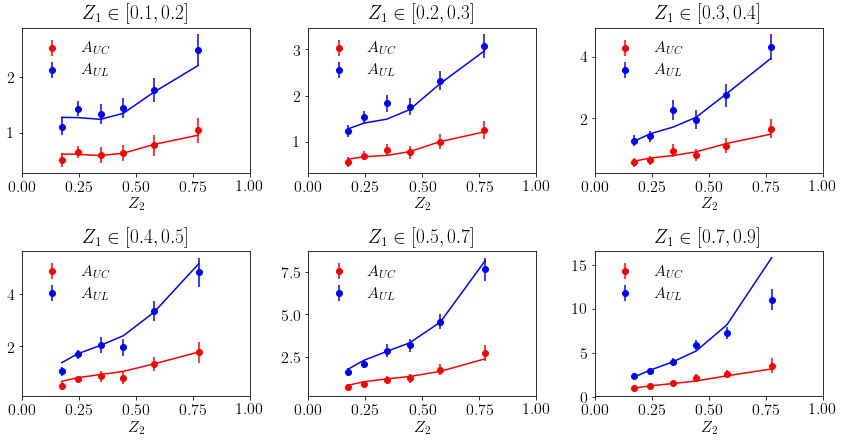

In [11]:
plotSIA(data[1002], data[1003], '$A_{UC}$', '$A_{UL}$')

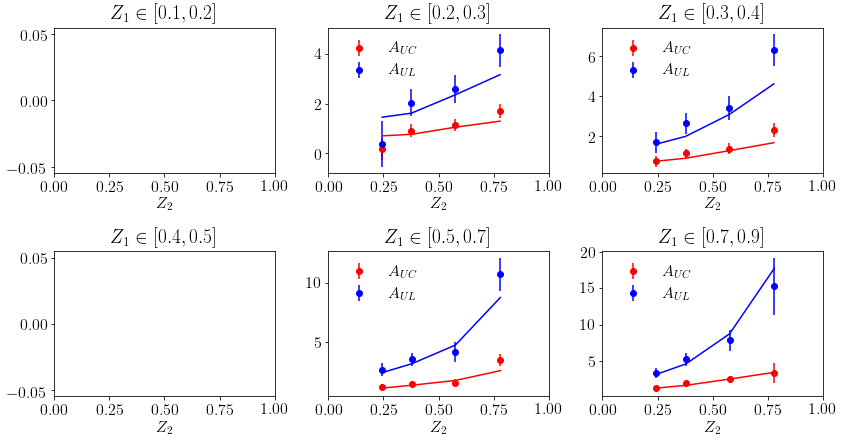

In [12]:
plotSIA(data[1004], data[1005], '$A_{UC}$', '$A_{UL}$')

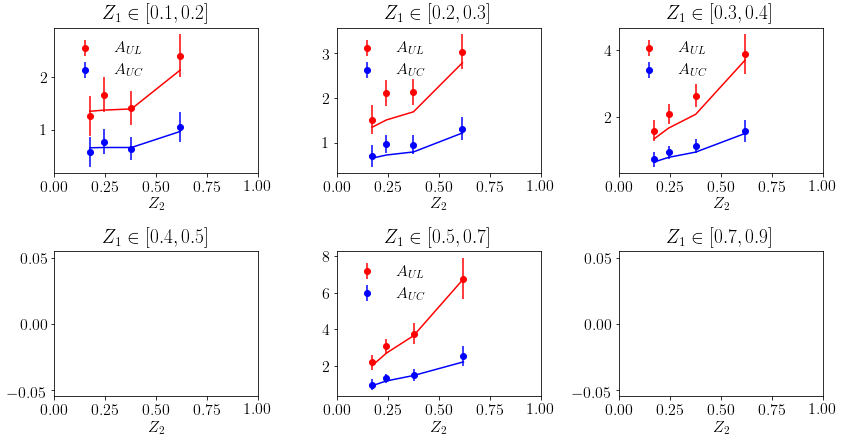

In [13]:
plotSIA(data[2008], data[2009], '$A_{UL}$', '$A_{UC}$')

In [17]:
plotSIA(data[2000], data[2002], '$A_{UL}$', '$A_{UC}$')

KeyError: 2000

In [18]:
plotSIA(data[2004], data[2005], '$A_{UL}$', '$A_{UC}$')

KeyError: 2004

## Load AN data from files

In [9]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [10]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BRAHMS, Observerable: AN, Points: 18
Collaboration: STAR, Observerable: AN, Points: 42


## Plot results 
Plot the data vs. theory curves

In [13]:
data = {}

for key, value in conf['resman'].ANres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [14]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [15]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

In [19]:
def plotBRAHMS(data1,data2,label1='dataset 1'):

    data_sub1 = data1.query('xF > 0')
    data_sub2 = data2.query('xF > 0')
    
    plt.errorbar(data_sub1.xF, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
    plt.plot(data_sub1.xF, data_sub1.thy, linestyle='-', color='red')
    
    plt.errorbar(data_sub2.xF, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label1)
    plt.plot(data_sub2.xF, data_sub2.thy, linestyle='-', color='blue')
    
    #plt.errorbar(data_sub3.xF, data_sub3.value, data_sub3.alpha, 
    #               marker='o', linestyle='', color='red', label=label3)
    #plt.plot(data_sub3.xF, data_sub3.thy, linestyle='-', color='red')
    
    #plt.errorbar(data_sub4.xF, data_sub4.value, data_sub4.alpha, 
    #                marker='o', linestyle='', color='blue', label=label1)
    #plt.plot(data_sub4.xF, data_sub4.thy, linestyle='-', color='blue')
    
    
    plt.xlim([0.1, 0.35])
    plt.xlabel('$x_F$')
    plt.title(label1,loc='left')
        
    plt.tight_layout()

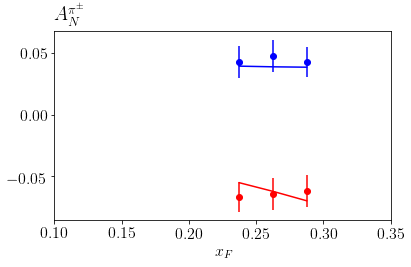

In [20]:
plotBRAHMS(data[1000],data[1002],'$A_{N}^{\pi^\pm}$')

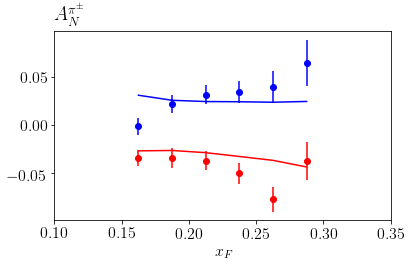

In [21]:
plotBRAHMS(data[1001],data[1003],'$A_{N}^{\pi^\pm}$')

In [26]:
def plotSTAR(data1,data2,data3,data4,label1='dataset 1'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    for k in range(len(data)):
    
        plt.subplot(2, 2, k+1)
    
        data_sub = data[k].query('xF > 0')
    
        plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
    
    
        plt.xlim([0.1, 0.8])
        plt.xlabel('$x_F$')
        plt.title(label1,loc='left')
        
    plt.tight_layout()

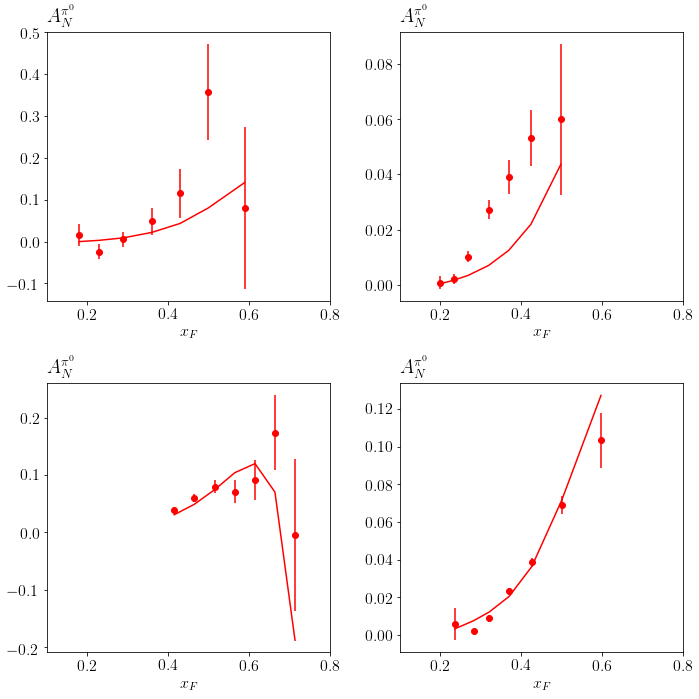

In [29]:
plotSTAR(data[2000],data[2001],data[2002],data[2003],'$A_{N}^{\pi^0}$')

In [31]:
def plotSTARdata(data1,data2,label1='dataset 1'):
    
    data = [data1,data2]
    
    plt.figure(figsize=(5,5))
    
    
    plt.subplot(1, 1, 1)
    
    data_sub = data[0].query('xF > 0')
    
    plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        #plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
        
    plt.subplot(1, 1, 1)
    
    data_sub = data[1].query('xF > 0')
    
    plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='blue', label=label1)
        #plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
        
    plt.xlim([0.1, 0.8])
    plt.xlabel('$x_F$')
    plt.ylabel('$A_{N}^{\pi^0}$')
    #plt.title(label1,loc='center')
    plt.legend(('$\eta=3.3$', '$\eta=3.7$'), frameon=False, loc='topleft')
        
    plt.tight_layout()

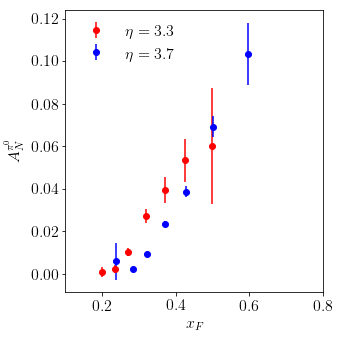

In [32]:
plotSTARdata(data[2001],data[2003],'$\eta=3.3\,{\rblue}\quad \eta = 3.7\,{\rm red}$')

## Load AUTsinphiS data from files

In [30]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([          u'N',          u'Q2',       u'Shift',           u'W',
                u'W2',       u'alpha',         u'col',  u'dependence',
                u'dy',   u'er_stat_u',     u'error_u',      u'hadron',
               u'obs',          u'pT',       u'pTmax',       u'pTmin',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
            u'syst_u',      u'target',         u'thy',       u'value',
                 u'x',        u'xmax',        u'xmin',           u'y',
                u'yh',          u'yp',           u'z',        u'zmax',
              u'zmin'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [31]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: HERMES, Observerable: AUTcollins, Points: 32
Collaboration: compass, Observerable: AUTcollins, Points: 74
Collaboration: compass, Observerable: AUTsinphiS, Points: 32


## Plot results 
Plot the data vs. theory curves

In [32]:
data = {}

for key, value in conf['resman'].sidisres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [33]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [34]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([          u'N',          u'Q2',       u'Shift',           u'W',
                u'W2',       u'alpha',         u'col',  u'dependence',
                u'dy',   u'er_stat_u',     u'error_u',      u'hadron',
               u'obs',          u'pT',       u'pTmax',       u'pTmin',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
            u'syst_u',      u'target',         u'thy',       u'value',
                 u'x',        u'xmax',        u'xmin',           u'y',
                u'yh',          u'yp',           u'z',        u'zmax',
              u'zmin'],
      dtype='object')

In [35]:
def plotAUTsinphiS(data1,data2,data3,data4,label1='dataset 1',label2='dataset2',label3='dataset3',label4='dataset4'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    _label=label1
    xlabel='$var$'
    xlim = [0.1,0.8]
    
    for k in range(len(data)):
    
        plt.subplot(2, 2, k+1)
    
        data_sub = data[k]
        
        if k==0: 
            _label=label1
            xlabel='$z$'
            xlim=[0.1,0.8]
            plt.errorbar(data_sub.z, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.z, data_sub.thy, linestyle='-', color='red')
        elif k==1: 
            _label=label2
            xlabel='$z$'
            xlim=[0.1,0.8]
            plt.errorbar(data_sub.z, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.z, data_sub.thy, linestyle='-', color='red')
        elif k==2: 
            _label=label3
            xlabel='$x$'
            xlim=[0.0,0.7]
            plt.errorbar(data_sub.x, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.x, data_sub.thy, linestyle='-', color='red')
        elif k==3: 
            _label=label4
            xlabel='$x$'
            xlim=[0.0,0.7]
            plt.errorbar(data_sub.x, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.x, data_sub.thy, linestyle='-', color='red')
    
        plt.xlim(xlim)
        plt.xlabel(xlabel)
        plt.title(_label,loc='left')
        
    plt.tight_layout()

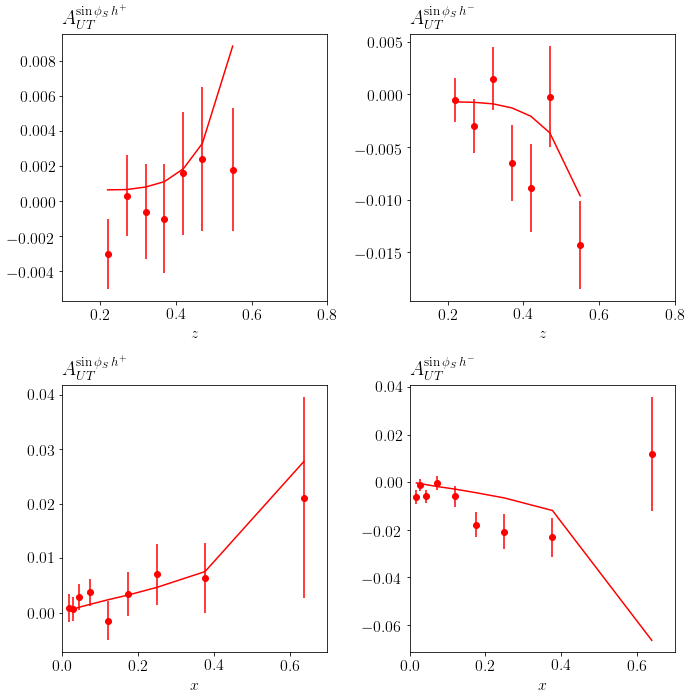

In [37]:
plotAUTsinphiS(data[9011],data[9022],data[9033],data[9044],'$A_{UT}^{\sin\phi_S\,h^+}$','$A_{UT}^{\sin\phi_S\,h^-}$','$A_{UT}^{\sin\phi_S\,h^+}$','$A_{UT}^{\sin\phi_S\,h^-}$')

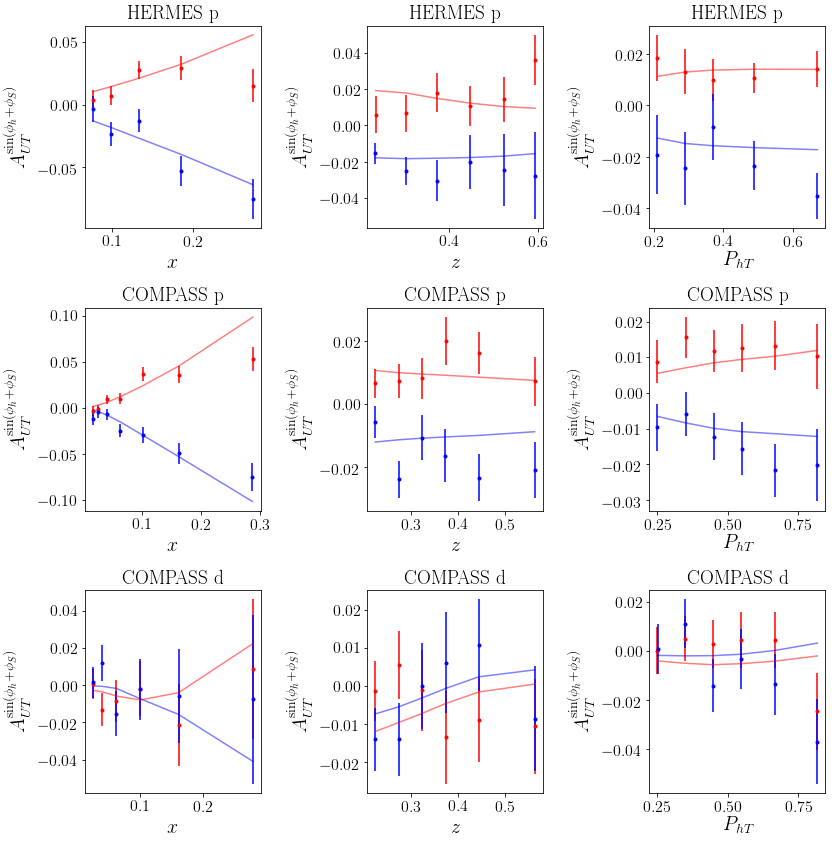

In [53]:
data = {}

for key, value in conf['resman'].sidisres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

nrows,ncols=3,3
fig = py.figure(figsize=(ncols*4,nrows*4))


tab=pd.concat([pd.DataFrame(data[3026]).query('target=="proton"'),data[3000].query('target=="proton"'),data[3003].query('target=="proton"'), \
              data[3016].query('target=="proton"'),data[3004].query('target=="proton"'),data[3018].query('target=="proton"')])
cnt=0
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dependence=="%s"'%_dep)
    pip=_tab.query('hadron=="pi+"')
    pim=_tab.query('hadron=="pi-"')
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax.errorbar(pip[dep],pip['value'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],pim['value'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],pim['thy'],color='b',alpha=0.5)
    #ax.fill_between(pip[dep],(pip['thy']-pip['dthy']),(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    #ax.fill_between(pim[dep],(pim['thy']-pim['dthy']),(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('HERMES p')

    
tab=pd.concat([pd.DataFrame(data[3027]).query('target=="proton"'),data[3025].query('target=="proton"'),data[3010].query('target=="proton"'), \
              data[3012].query('target=="proton"'),data[3005].query('target=="proton"'),data[3013].query('target=="proton"')])
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dependence=="%s"'%_dep)
    pip=_tab.query('hadron=="pi+"')
    pim=_tab.query('hadron=="pi-"')
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax.errorbar(pip[dep],-pip['value'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['value'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    #ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    #ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('COMPASS p')

tab=pd.concat([pd.DataFrame(data[4000]).query('target=="deuteron"'),data[4001].query('target=="deuteron"'),data[4002].query('target=="deuteron"'), \
              data[4003].query('target=="deuteron"'),data[4004].query('target=="deuteron"'),data[4005].query('target=="deuteron"')])
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pT'
    else: _dep=dep
    if dep=='pT': label='P_{hT}'
    if dep=='x': label='x'
    if dep=='z': label='z'                
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dependence=="%s"'%_dep)
    pip=_tab.query('hadron=="pi+"')
    pim=_tab.query('hadron=="pi-"')
    ax.errorbar(pip[dep],-pip['value'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['value'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    #ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    #ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%label,size=20); ax.set_ylabel(r'$A_{UT}^{\sin(\phi_h+\phi_S)}$',size=20)
    ax.set_title('COMPASS d')


py.tight_layout()
#py.savefig("%s/data_vs_theory.pdf"%path2figs)

In [71]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,0.999)
Z=np.append(Z1,Z2)
Hpiu=[conf['collins'].get_C(z,1,'pi+')[1] for z in Z]
Hpid=[conf['collins'].get_C(z,1,'pi+')[3] for z in Z]

In [72]:
X1=10**np.linspace(-4,-2)
X2=np.linspace(0.0101,0.999)
X=np.append(X1,X2)
Q2=2.
TRu= [conf['transversity'].get_C(x,Q2,target='p')[1] for x in X]
TRd= [conf['transversity'].get_C(x,Q2,target='p')[3] for x in X]

In [76]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,0.999)
Z=np.append(Z1,Z2)
Htildepiu=[conf['Htilde'].get_C(z,1,'pi+')[1] for z in Z]
Htildepid=[conf['Htilde'].get_C(z,1,'pi+')[3] for z in Z]

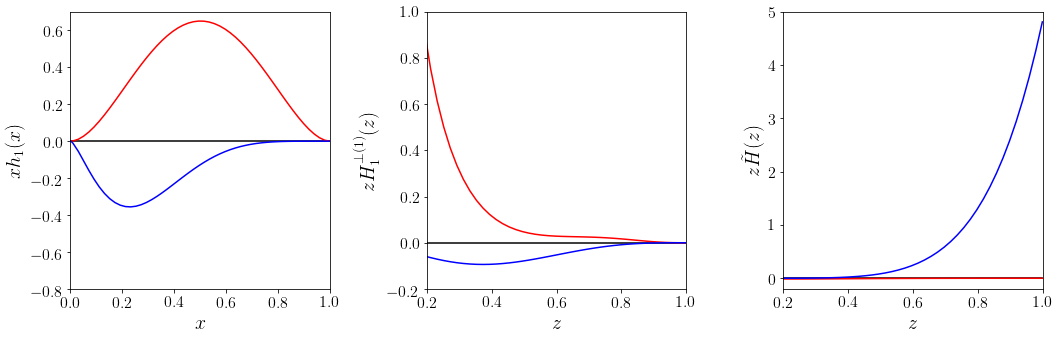

In [101]:
nrows,ncols=1,3
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.fill_between(X,X*(TR['f'][1]-TR['df'][1]),X*(TR['f'][1]+TR['df'][1]),color='r',alpha=0.5,label="u")
#ax.fill_between(X,X*(TR['f'][3]-TR['df'][3]),X*(TR['f'][3]+TR['df'][3]),color='b',alpha=0.5,label="d")
ax.plot(X,X*0,'black')
ax.plot(X,X*TRu,'r')
ax.plot(X,X*TRd,'b')
ax.set_ylabel(r'$x h_{1}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_ylim(-0.8,0.7)
ax.set_xlim(0.,1)
#xmin=np.amin(tab['x'])
#xmax=np.amax(tab['x'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,2)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Hpiu,'r')
ax.plot(Z,Z*Hpid,'b')
ax.set_ylabel(r'$z H_1^{\perp (1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.2,1.)
ax.set_xlim(0.2,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,3)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Htildepiu,'r')
ax.plot(Z,Z*Htildepid,'b')
ax.set_ylabel(r'$z\tilde{H}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.2,5.)
ax.set_xlim(0.2,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)



py.tight_layout()

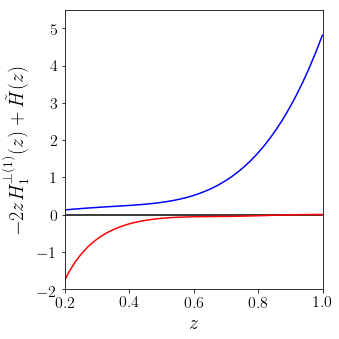

In [97]:
nrows,ncols=1,1
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,-2*Z*Hpiu+Htildepiu,'r')
ax.plot(Z,-2*Z*Hpid+Htildepid,'b')
ax.set_ylabel(r'$-2z H_1^{\perp (1)}(z)+\tilde{H}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-2,5.5)
ax.set_xlim(0.2,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)


py.tight_layout()